# **Embedding Visualization for Bert**

Packages

In [ ]:
import numpy as np
import torch
from sklearn.metrics import pairwise_distances
from transformers import BertModel, BertTokenizerFast

# Displaying Traditional Chinese in Colab
# reference:https://colab.research.google.com/github/willismax/matplotlib_show_chinese_in_colab/blob/master/matplotlib_show_chinese_in_colab.ipynb
!gdown --id '1JWHUSlcPwoEzmr0VE6J71jcnwinH10G6' --output taipei_sans_tc_beta.ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
myfont = FontProperties(fname=r'taipei_sans_tc_beta.ttf')


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JWHUSlcPwoEzmr0VE6J71jcnwinH10G6
To: /content/taipei_sans_tc_beta.ttf
100% 20.7M/20.7M [00:00<00:00, 102MB/s] 


In [ ]:
model = BertModel.from_pretrained('bert-base-chinese', output_hidden_states=True).eval()
tokenizer = BertTokenizerFast.from_pretrained('bert-base-chinese')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/412M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

### "蘋"
#### Sentences for Visualization

In [ ]:
sentences = []
sentences += ["今天買了蘋果來吃"] # Today, (I) bought an apple to eat.
sentences += ["進口蘋果（富士)平均每公斤下跌12.3%"] # The average price per kilogram of imported Fuji apples fell by 12.3%.
sentences += ["蘋果茶真難喝"] # Apple tea tastes really bad.
sentences += ["老饕都知道智利的蘋果季節即將到來"] # Foodies all know that the Chilean apple season is coming soon.
sentences += ["進口蘋果因防止水分流失故添加人工果糖"] # Imported apples are added with artificial fructose to prevent moisture loss.
sentences += ["吃吐司就是要塗蘋果醬"] # Toast must be spread with apple jam.
sentences += ["蘋果即將於下月發振新款iPhone"] # Apple will launch a new iPhone model next month.
sentences += ["蘋果獲新Face ID專利"] # Apple has obtained a new Face ID patent.
sentences += ["今天買了蘋果手機"] # Today, (I) bought an Apple smartphone.
sentences += ["蘋果的股價又跌了"] # Apple's stock price has dropped again.
sentences += ["蘋果押寶指紋辨識技術"] # Apple is betting on fingerprint recognition technology.
sentences += ["蘋果太貴買不起"] # Apples are too expensive to buy.
sentences += ["買蘋果送我好嗎"] # Purchase the Apple(s)/apple(s) and give me for free.
sentences += ["買個蘋果送我好嗎"] # Purchase an apple and give me for free.
sentences += ["買顆蘋果送我好嗎"] # Purchase an apple and give me for free.
sentences += ["買隻蘋果送我好嗎"] # Purchase an Apple and give me for free.
sentences += ["早上我去健身房跑蘋果"] # *In the morning, I went to the gym to run apple.


#### Embedding Visualization using Euclidean Distance

In [ ]:
# Index of "蘋". e.g. the index of "蘋" in "今天買了蘋果來吃" is 5 (i.e. the 6th item).
select_word_index = [4, 2, 0, 8, 2, 7, 0, 0, 4, 0, 0, 0, 1, 2, 2, 2, 8]

def euclidean_distance(a, b):
    return np.linalg.norm(a-b,ord=2)

METRIC = euclidean_distance

def get_select_embedding(output, tokenized_sentence, select_word_index):
    LAYER = 12 # The layer to visualize. You can choose from 0 to 12.
    hidden_state = output.hidden_states[LAYER][0]
    select_token_index = tokenized_sentence.word_to_tokens(select_word_index).start
    return hidden_state[select_token_index].numpy()

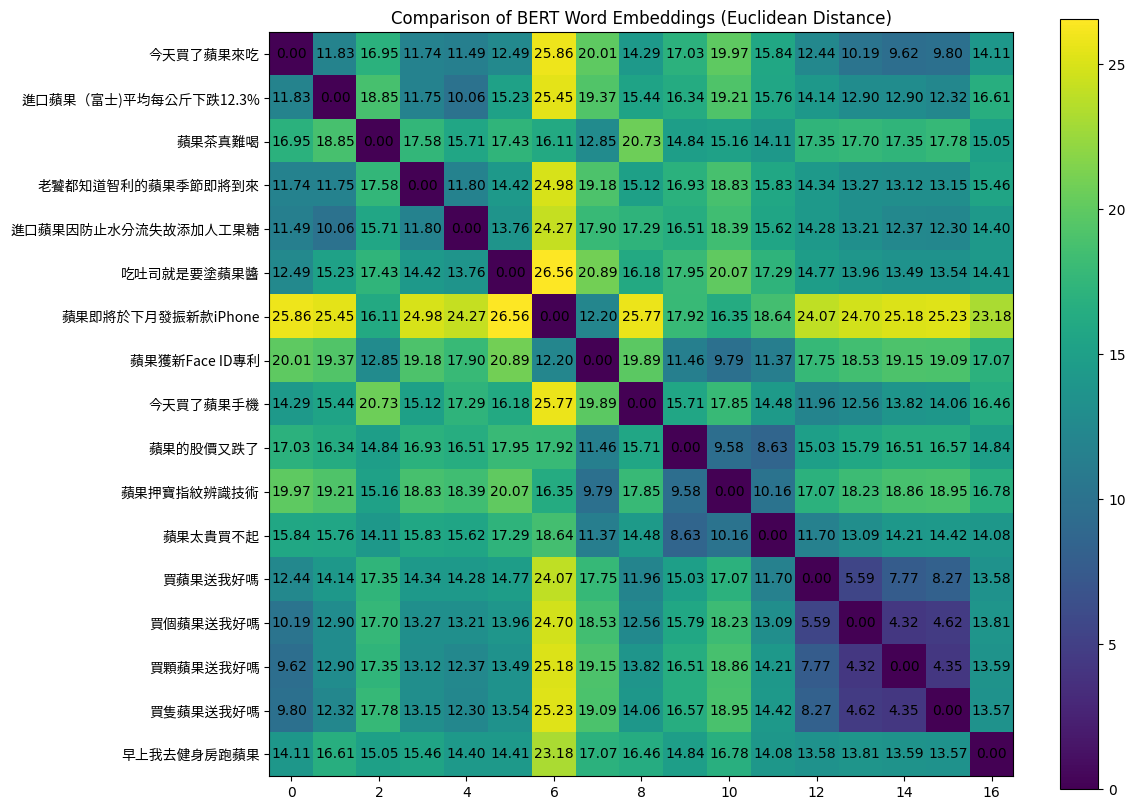

In [ ]:
tokenized_sentences = [tokenizer(sentence, return_tensors='pt') for sentence in sentences]

with torch.no_grad():
    outputs = [model(**tokenized_sentence) for tokenized_sentence in tokenized_sentences]

# "embeddings" has shape (len(sentences), 768), where 768 is the dimension of BERT's hidden state
embeddings = [get_select_embedding(outputs[i], tokenized_sentences[i], select_word_index[i]) for i in range(len(outputs))]

# "similarity_matrix" has shape [len(sentences), len(sentences)]
similarity_matrix = pairwise_distances(embeddings, metric=METRIC)

# Plot the similarity matrix
plt.rcParams['figure.figsize'] = [12, 10]
plt.imshow(similarity_matrix)
plt.colorbar()
plt.yticks(ticks=range(len(sentences)), labels=sentences, fontproperties=myfont)
plt.title('Comparison of BERT Word Embeddings (Euclidean Distance)')
for (i,j), label in np.ndenumerate(similarity_matrix):
    plt.text(i, j, '{:.2f}'.format(label), ha='center', va='center')
plt.show()

#### Embedding Visualization using Cosine Similarity

In [ ]:
select_word_index = [4, 2, 0, 8, 2, 7, 0, 0, 4, 0, 0, 0, 1, 2, 2, 2, 8]

def cosine_similarity(a, b):
    return a.dot(b) / (np.linalg.norm(a) * np.linalg.norm(b))

METRIC = cosine_similarity

def get_select_embedding(output, tokenized_sentence, select_word_index):
    LAYER = 12 # The layer to visualize. You can choose from 0 to 12.
    hidden_state = output.hidden_states[LAYER][0]
    select_token_index = tokenized_sentence.word_to_tokens(select_word_index).start
    return hidden_state[select_token_index].numpy()

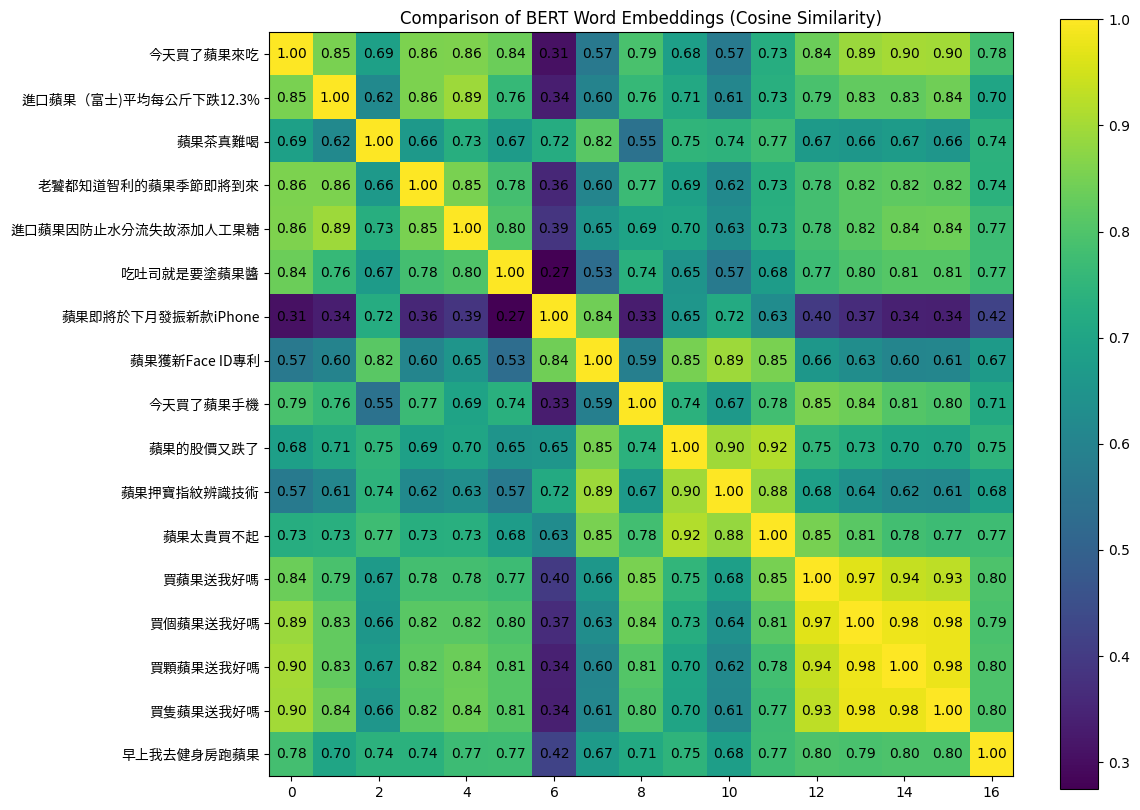

In [ ]:
tokenized_sentences = [tokenizer(sentence, return_tensors='pt') for sentence in sentences]

with torch.no_grad():
    outputs = [model(**tokenized_sentence) for tokenized_sentence in tokenized_sentences]

# "embeddings" has shape (len(sentences), 768), where 768 is the dimension of BERT's hidden state
embeddings = [get_select_embedding(outputs[i], tokenized_sentences[i], select_word_index[i]) for i in range(len(outputs))]

# "similarity_matrix" has shape [len(sentences), len(sentences)]
similarity_matrix = pairwise_distances(embeddings, metric=METRIC)

# Plot the similarity matrix
plt.rcParams['figure.figsize'] = [12, 10]
plt.imshow(similarity_matrix)
plt.colorbar()
plt.yticks(ticks=range(len(sentences)), labels=sentences, fontproperties=myfont)
plt.title('Comparison of BERT Word Embeddings (Cosine Similarity)')
for (i,j), label in np.ndenumerate(similarity_matrix):
    plt.text(i, j, '{:.2f}'.format(label), ha='center', va='center')
plt.show()

### "吃"
#### Sentences for Visualization

In [ ]:
sentences = []
sentences += ["他不喜歡吃蘋果"] # He doesn't like to eat apples.
sentences += ["他不喜歡吃魚翅"] # He doesn't like to eat shark's fins.
sentences += ["他不喜歡吃蛋糕"] # He doesn't like to eat cakes.
sentences += ["他不喜歡吃檳榔"] # He doesn't like to chew areca nuts.
sentences += ["他不喜歡吃奶嘴"] # He doesn't like to suck on a pacifier.
sentences += ["他不喜歡吃喜酒"] # He doesn't like to attend a wedding feast
sentences += ["他不喜歡吃摩斯"] # He doesn't like to eat at Mos Burger (a burger chain).
sentences += ["他不喜歡吃官司"] # He doesn't like to get sued.
sentences += ["他不喜歡吃敗仗"] # He doesn't like to lose a battle.
sentences += ["他不喜歡吃悶虧"] # He doesn't like to be compelled to suffer in silence.
sentences += ["他不喜歡吃原則"] # *He doesn't like to eat principles.

#### Embedding Visualization using Euclidean Distance

In [ ]:
select_word_index = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4,4]

def euclidean_distance(a, b):
    return np.linalg.norm(a-b,ord=2)

METRIC = euclidean_distance

def get_select_embedding(output, tokenized_sentence, select_word_index):
    LAYER = 12 # The layer to visualize. You can choose from 0 to 12.
    hidden_state = output.hidden_states[LAYER][0]
    select_token_index = tokenized_sentence.word_to_tokens(select_word_index).start
    return hidden_state[select_token_index].numpy()

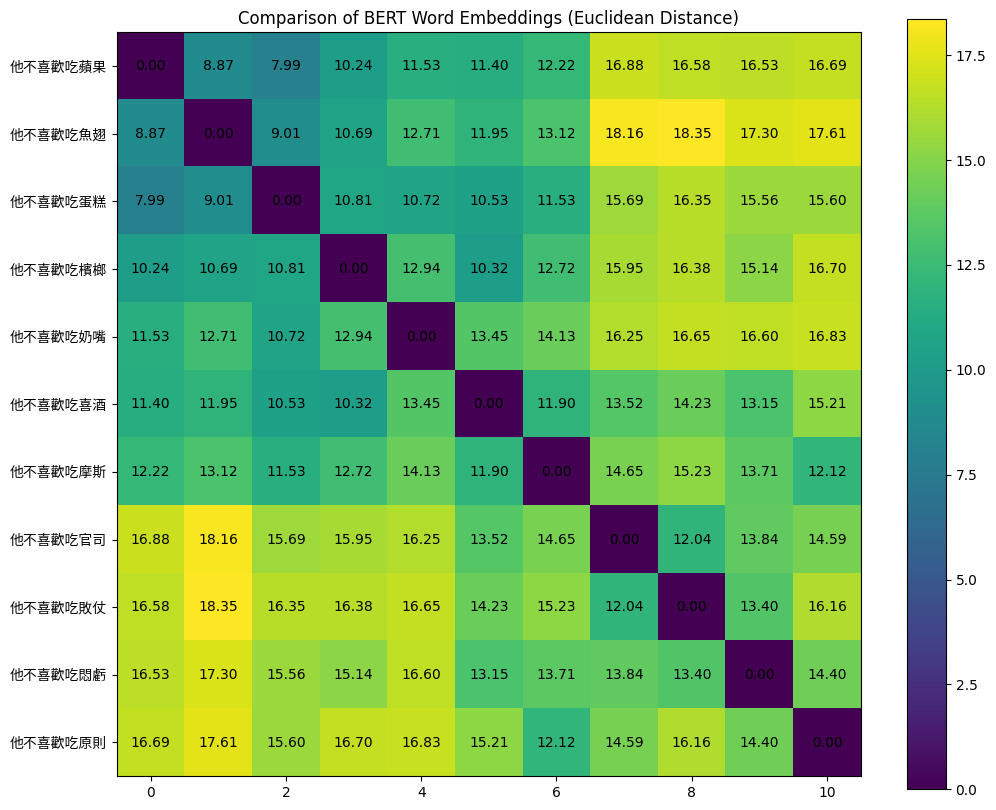

In [ ]:
tokenized_sentences = [tokenizer(sentence, return_tensors='pt') for sentence in sentences]

with torch.no_grad():
    outputs = [model(**tokenized_sentence) for tokenized_sentence in tokenized_sentences]

# "embeddings" has shape (len(sentences), 768), where 768 is the dimension of BERT's hidden state
embeddings = [get_select_embedding(outputs[i], tokenized_sentences[i], select_word_index[i]) for i in range(len(outputs))]

# "similarity_matrix" has shape [len(sentences), len(sentences)]
similarity_matrix = pairwise_distances(embeddings, metric=METRIC)

# Plot the similarity matrix
plt.rcParams['figure.figsize'] = [12, 10]
plt.imshow(similarity_matrix)
plt.colorbar()
plt.yticks(ticks=range(len(sentences)), labels=sentences, fontproperties=myfont)
plt.title('Comparison of BERT Word Embeddings (Euclidean Distance)')
for (i,j), label in np.ndenumerate(similarity_matrix):
    plt.text(i, j, '{:.2f}'.format(label), ha='center', va='center')
plt.show()

#### Embedding Visualization using Cosine Similarity

In [ ]:
select_word_index = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4,4]

def cosine_similarity(a, b):
    return a.dot(b) / (np.linalg.norm(a) * np.linalg.norm(b))

METRIC = cosine_similarity

def get_select_embedding(output, tokenized_sentence, select_word_index):
    LAYER = 12 # The layer to visualize. You can choose from 0 to 12.
    hidden_state = output.hidden_states[LAYER][0]
    select_token_index = tokenized_sentence.word_to_tokens(select_word_index).start
    return hidden_state[select_token_index].numpy()

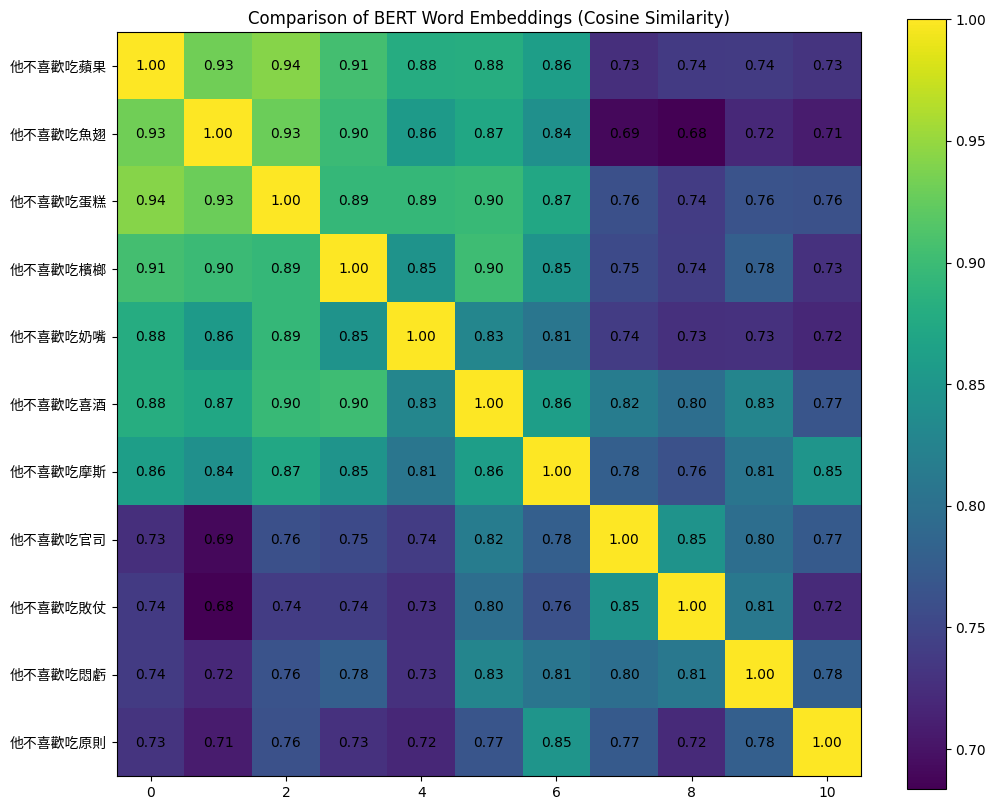

In [ ]:
tokenized_sentences = [tokenizer(sentence, return_tensors='pt') for sentence in sentences]

with torch.no_grad():
    outputs = [model(**tokenized_sentence) for tokenized_sentence in tokenized_sentences]

# "embeddings" has shape (len(sentences), 768), where 768 is the dimension of BERT's hidden state
embeddings = [get_select_embedding(outputs[i], tokenized_sentences[i], select_word_index[i]) for i in range(len(outputs))]

# "similarity_matrix" has shape [len(sentences), len(sentences)]
similarity_matrix = pairwise_distances(embeddings, metric=METRIC)

# Plot the similarity matrix
plt.rcParams['figure.figsize'] = [12, 10]
plt.imshow(similarity_matrix)
plt.colorbar()
plt.yticks(ticks=range(len(sentences)), labels=sentences, fontproperties=myfont)
plt.title('Comparison of BERT Word Embeddings (Cosine Similarity)')
for (i,j), label in np.ndenumerate(similarity_matrix):
    plt.text(i, j, '{:.2f}'.format(label), ha='center', va='center')
plt.show()